In [307]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

In [308]:
dados = pd.read_csv(r"C:\Users\Gustavo1\Documents\Programming_codes\POS-ALURA\A1-analise-exploracao-dados\bases\A150850189_28_143_208.csv", encoding="utf-8-sig",
            skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")

pd.set_option('display.float_format','{:.2f}'.format)
#pd.get_option('float_format', "{:.2f}".format())

In [ ]:
#dados['2021/Set'].mean(numeric_only=True)
dados = dados.rename({dados.columns[0]:'UF'}, axis='columns')
dados.head

In [ ]:
dados.plot(x='UF', y='2008/Jan')

In [ ]:
axis = dados.plot(x='UF', y='2008/Jan', kind='bar', figsize=(10,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor por UF")
plt.xticks(rotation= 45)
plt.show()

### Desafio 1: Executar o comando anterior com os dados mais recentes na base
### Desafio 2: Deixar as legendas ânguladas (45, 90, etc) para facilitar a leitura

In [ ]:
axis = dados.plot(x='UF', y='2021/Set', kind='bar', figsize=(10,5))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.title("Valor por UF")
plt.show()

In [ ]:
dados[['2008/Ago', '2008/Set']].head()

In [ ]:
colunas_usaveis = dados.mean(numeric_only=True).index.tolist()
colunas_usaveis.insert(0, 'UF')
colunas_usaveis[:5]

In [ ]:
dados_usaveis = dados[colunas_usaveis]
dados_usaveis.head()

In [ ]:
dados_usaveis = dados_usaveis.set_index('UF')
dados_usaveis.head()

In [ ]:
dados_usaveis['2009/Ago'].head()

In [290]:
dados_usaveis.loc['12 Acre']

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2021/Jun     3458187.11
2021/Jul     2302711.01
2021/Ago     1196754.85
2021/Set           0.00
Total      475290315.34
Name: 12 Acre, Length: 171, dtype: float64

In [291]:
dados_usaveis.iloc[1]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2021/Jun     3458187.11
2021/Jul     2302711.01
2021/Ago     1196754.85
2021/Set           0.00
Total      475290315.34
Name: 12 Acre, Length: 171, dtype: float64

In [ ]:
# Vai exibir um gráfico com uma legenda imensa, pois existe muitas colunas
dados_usaveis.plot(figsize=(12,6))

In [ ]:
# O metodo " T ", transpoem as colunas e linhas, basicamente inverte as colunas com as linhas
dados_usaveis.T.plot(figsize=(12,6))

In [ ]:
dados_usaveis = dados_usaveis.drop('Total', axis=1)
dados_usaveis.tail()

In [ ]:
dados_usaveis.T.plot(figsize=(12,6))
plt.show()

### Desafio 3: reposicionar a legenda. Dentro? Fora? Onde?
### Desafio 4: Retocar o título da visualização
### Desafio 5: Adicionar títulos aos dois eixos

In [ ]:
dados_usaveis.T.plot(figsize=(12,6))
plt.legend(bbox_to_anchor=(1.25, 1.015),loc='upper right') # Desafio 3
plt.title('Gastos por UF no decorrer dos anos') # Desafio 4
# Desafio 5
plt.xlabel('Período') 
plt.ylabel('Valor Gasto')
plt.show()

In [ ]:
dados_usaveis.T.columns[:5]

In [ ]:
dados_usaveis[:7].T.plot(figsize=(10,6))
plt.show()

In [ ]:
dados_usaveis.sample(n=7)

In [ ]:
dados_usaveis.sample(7).T.plot(figsize=(10,6))

In [ ]:
np.random.seed(42)
dados_usaveis.sample(n=7)

In [ ]:
dados_usaveis.sample(7).T.plot(figsize=(10,6))

In [ ]:
dados_usaveis['Total'] = dados_usaveis.sum(axis=1)
np.random.seed(42)
dados_usaveis.head(7)

##### Desafio 6: Ordernar dataframe com base na coluna total, para que na primeira tenha a linha com maior gasto, e na última coluna com menor gasto (ordenação)
##### Desafio 7: adicionar uma coluna com a região de cada estado
##### Desafio 8: adicione seu estado nessa lista de 7 estados

In [ ]:
# Concluir código do desafio 7
df_teste = dados_usaveis.copy(deep=True)
dados_usaveis['Região'] = None
for i in range(len(dados_usaveis.index)):
    #x = int(dados_usaveis.index[i][:2])
    if int(dados_usaveis.index[i][:2]) >= 11 and int(dados_usaveis.index[i][:2]) <= 16:
        dados_usaveis.iloc[[i][:2], -1] = 'Norte'
    elif int(dados_usaveis.index[i][:2]) >= 17 and int(dados_usaveis.index[i][:2]) <= 29:
        dados_usaveis.iloc[[i][:2], -1]  = 'Nordeste'
    elif int(dados_usaveis.index[i][:2]) >= 31 and int(dados_usaveis.index[i][:2]) <= 35:
        dados_usaveis.iloc[[i][:2], -1]  = 'Sudeste'
    elif int(dados_usaveis.index[i][:2]) >= 41 and int(dados_usaveis.index[i][:2]) <= 50:
        dados_usaveis.iloc[[i][:2], -1] = 'Sul'
    else:
        dados_usaveis.iloc[[i][:2], -1]  = 'Centro-Oeste'

dados_usaveis.iloc[:,-1]

In [ ]:
np.random.seed(42)
dados_dos_7_estados = dados_usaveis.sample(7)

# Desafio 8
dados_dos_7_estados.loc[7] = dados_usaveis.loc['35 São Paulo']
dados_dos_7_estados = dados_dos_7_estados.rename(index={7:'35 São Paulo'})

# Desafio 6
dados_dos_7_estados.sort_values(by='Total', ascending=False)

In [ ]:
ordenados_por_total = dados_dos_7_estados
ordenados_por_total = ordenados_por_total.drop('Total', axis=1)
ordenados_por_total

In [ ]:
colunas_interessantes = ordenados_por_total.columns[6:]
ordenados_por_total = ordenados_por_total[colunas_interessantes]
ordenados_por_total

In [ ]:
ordenados_por_total.T.plot(figsize=(10,6))

##### Desafio 9: Formatar o gráfico (titulo, legenda, eixos, rotulos, valores)
##### Desafio 10: Pesquisar a função sort_index
##### Desafio 11: Pesquisar os casos de dengue no Brasil e verificar se existe algum padrão com os gastos encontrados aqui
##### Desafio 12: Plotar apenas os dados de uma região do brasil

In [345]:
np.random.seed(42)
ordenados_por_total.iloc[:,:-2] = ordenados_por_total.iloc[:,:-2].astype(float)
ordenados_por_total.dtypes
#ordenados_por_total.T.iloc[:5].plot(figsize=(10,6))

2008/Fev    float64
2008/Mar    float64
2008/Abr    float64
2008/Mai    float64
2008/Jun    float64
             ...   
2021/Jun    float64
2021/Jul    float64
2021/Ago    float64
2021/Set    float64
Região       object
Length: 165, dtype: object

In [338]:
np.random.seed(42)
ordenados_por_total.T.iloc[:20,:].plot(figsize=(10,6))

# Formatação eixo Y
current_values = plt.gca().get_yticks() # Armazena valores do eixo Y
plt.gca().set_yticklabels(['R${:,.0f}'.format(x) for x in current_values]) # Formata e configura rotulo do eixo Y

plt.title('Gasto total com saúde por mês/ano')
plt.legend(bbox_to_anchor=(1.25, 1.015), loc='upper right')
plt.xlabel('Período')
plt.ylabel('Valor Gasto')
plt.show()

TypeError: no numeric data to plot

<Axes: >

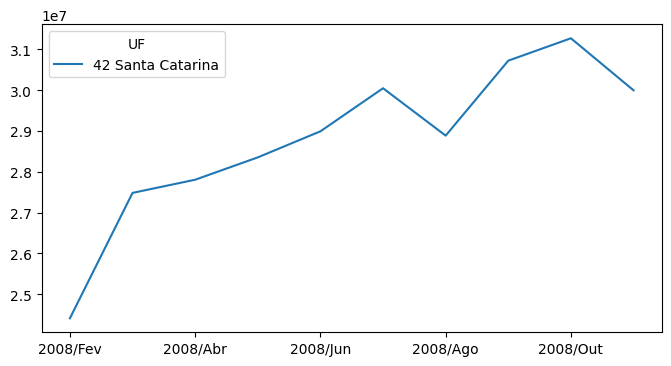

In [335]:
regiao_especifica = ordenados_por_total[ordenados_por_total['Região'] == 'Sul']
regiao_especifica.T.iloc[:10,:].plot(figsize=(8,4))